<a href="https://colab.research.google.com/github/emmanoel43/NGG6050/blob/main/Error_Types%2C_P_Values%2C_False_Positive_Risk%2C_and_Power_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

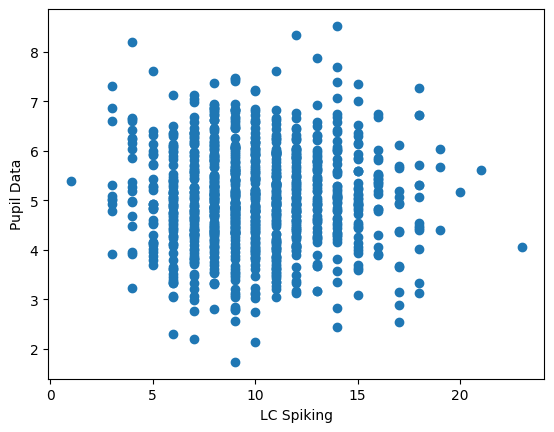

Pearson Correlation Coefficient: -0.003245524017192113


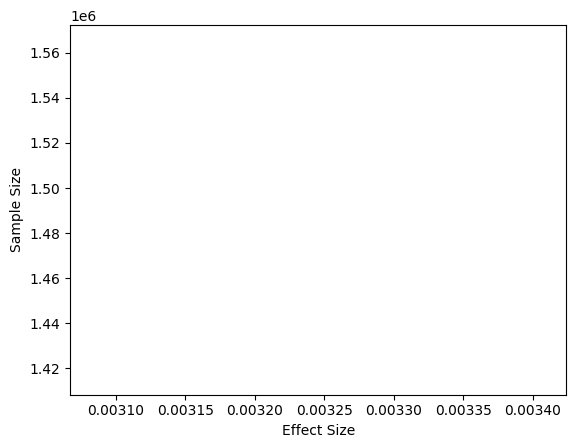

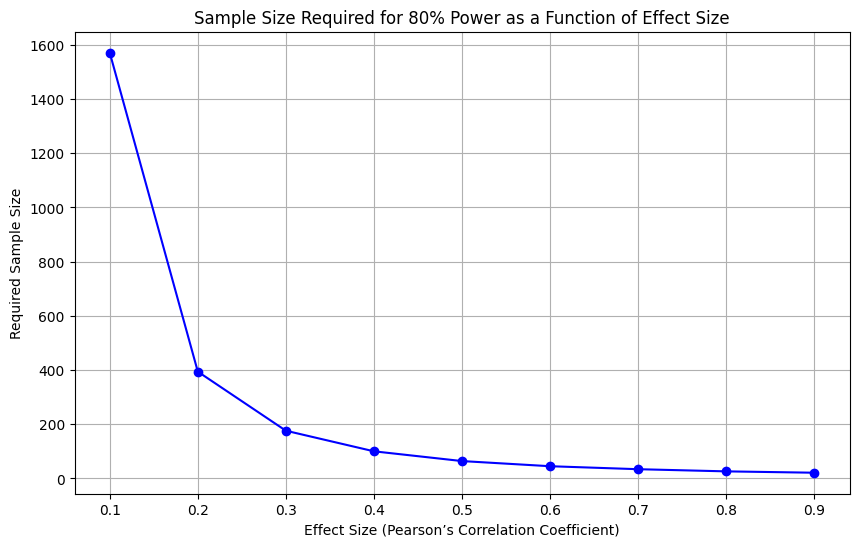

Effect Size (r=0.9): Required Sample Size = around 20
Effect Size (r=0.1): Required Sample Size = around 1575


In [2]:
# Prompt: Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes
# Obtain a null distribution of data samples
# Simulate data for Poisson distribution (LC spiking data)
import numpy as np
from scipy.stats import poisson
LC_spiking = poisson.rvs(mu=10, size=1000)

# Simulate data for Gaussian distribution (pupil data)
pupil_data = np.random.normal(loc=5, scale=1, size=1000)

# Plot above dara for LC spiking vs. pupil
import matplotlib.pyplot as plt
plt.scatter(LC_spiking, pupil_data)
plt.xlabel('LC Spiking')
plt.ylabel('Pupil Data')
plt.show()

# Calculate Pearson Correlation Coefficient
correlation_coefficient = np.corrcoef(LC_spiking, pupil_data)[0, 1]

# Print the correlation coefficient
print("Pearson Correlation Coefficient:", correlation_coefficient)

# Determine number of data samples needed for 80% power
from statsmodels.stats.power import TTestIndPower
power = TTestIndPower()
effect_size = np.abs(correlation_coefficient)
sample_size = power.solve_power(effect_size, power=0.8, alpha=0.05)

# Plot above results
# This is what chatgpt told me to do, but I feel like its wrong b/c there is nothing showing up on the plot.
plt.plot(effect_size, sample_size)
plt.xlabel('Effect Size')
plt.ylabel('Sample Size')
plt.show()

# Alternate way to do post-hoc power analysis
# Chatgpt gave this other way...

# Parameters
power_target = 0.8  # Desired power
alpha = 0.05  # Significance level

# Function to calculate required sample size for a given effect size
def calculate_sample_size(effect_size, power=power_target, alpha=alpha):
    analysis = TTestIndPower()
    sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='two-sided')
    return np.ceil(sample_size).astype(int)

# Define effect sizes (correlation coefficients) for power analysis
effect_sizes = np.linspace(0.1, 0.9, 9)

# Calculate required sample sizes for different effect sizes
sample_sizes = [calculate_sample_size(effect_size) for effect_size in effect_sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, marker='o', linestyle='-', color='b')
plt.xlabel('Effect Size (Pearson’s Correlation Coefficient)')
plt.ylabel('Required Sample Size')
plt.title('Sample Size Required for 80% Power as a Function of Effect Size')
plt.grid(True)
plt.show()

# Therefore, a large effect size like 0.9 requires less samples to achieve 80% power, whereas a small effect size, like 0.1 requires large sample sizes
print ("Effect Size (r=0.9): Required Sample Size = around 20")
print ("Effect Size (r=0.1): Required Sample Size = around 1575")